In [176]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [177]:
data = np.array([(3, 4, 1), (1.5, 5, 1), (6,8, 1), (2.5, 5, 1), (6, 6, 1), (5, 2.5, 1), (5,2, 1), (8,3, 1), (4.5, 3, 1)])
y =    np.array([  -1,      -1,      -1,    -1,       1, 1,        1,    1,      1])

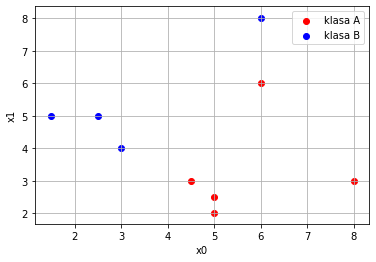

In [178]:
klasa_a = y>0
klasa_b = y<0

plt.scatter(data[klasa_a,0], data[klasa_a,1], c='r', label='klasa A')
plt.scatter(data[klasa_b,0], data[klasa_b,1], c='b', label='klasa B')
plt.grid(True)
plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()

Jednačina linearnog klasifikatora u 2D prostoru

$ w_0*x_0 + w_1*x_1+ w_2*1 < 0$

$ w_0*x_0 + w_1*x_1+ w_2*1 = 0$

$ w_0*x_0 + w_1*x_1+ w_2*1 > 0$


In [179]:
w = np.array([1., -1., -1.])

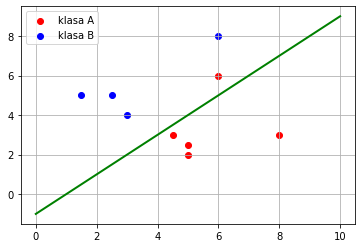

In [181]:
def nacrtaj_granicu(data, y, w):
    x_g = [0, 10] 
    y_g = [(-w[0]*x-w[2])/w[1] for x in x_g]

    plt.plot(x_g, y_g, 'g', lw=2)
    klasa_a = y>0
    klasa_b = y<0

    plt.scatter(data[klasa_a,0], data[klasa_a,1], c='r', label='klasa A')
    plt.scatter(data[klasa_b,0], data[klasa_b,1], c='b', label='klasa B')

    plt.grid(True)
    plt.legend()
    
    
nacrtaj_granicu(data, y, np.array([1., -1., -1.]))    

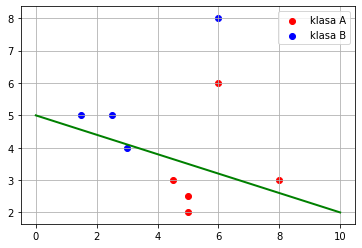

In [182]:
nacrtaj_granicu(data, y, [0.3, 1., -5.])

In [183]:
def linearna_klasifikacija(w0, data, y):
    print(len(data))
    t = []
    ls = 0.005 # korak ucenja
    
    max_it = 5000
    for it in range(max_it):
        err = 0 # broj pogresno klasifikovanih elemenata
        n = 100
        for i in range(n):
            j = random.choice(range(len(data)))
            rt = np.inner(w0, data[j]) # odredi sa koje strane w0 se nalazi
            if(np.sign(rt)!= np.sign(y[j])): # ako nije sa dobre strane
                w0 -= ls*data[j]*np.sign(rt) 
                err += 1
        err = 100.*err/float(n)
        t.append([it, err])
        if(it%50==0):
            print(it, err, w0, ls) 
        if err==0:
            break
        
    return w0, np.array(t)

In [184]:
w, t = linearna_klasifikacija(np.array([0.3, 1., -5.]), data, y)
w

9
0 45.0 [ 0.6075  0.7375 -4.975 ] 0.005


array([ 1.3625, -0.455 , -4.725 ])

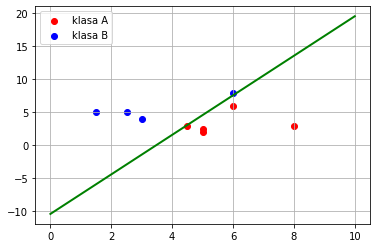

In [186]:
nacrtaj_granicu(data, y, w)

Malo komplikovanije
